This script generates the plots for the figures S6 to S8 in the supplementary material using a `.pkl` file containing the selected simulation outputs created by the **data_saving.py** script.

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Importing libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mlt
import numpy as np
from matplotlib.ticker import MultipleLocator,LogLocator, FixedLocator
from matplotlib.ticker import ScalarFormatter,NullFormatter
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
params = {'mathtext.default': 'regular' }
plt.rcParams['axes.linewidth'] = 3
y_formatter = ScalarFormatter()
from my_functions import s_transfer, S6, S7
import joblib as jb


**Now loading the data**

In [4]:
all_data = jb.load('../data/selected_simulations_time_short.pkl')
main_headers = all_data.keys()
#print("Main Headers: Simulations")
#for header in main_headers:
#    print(header)

**ploting S6**

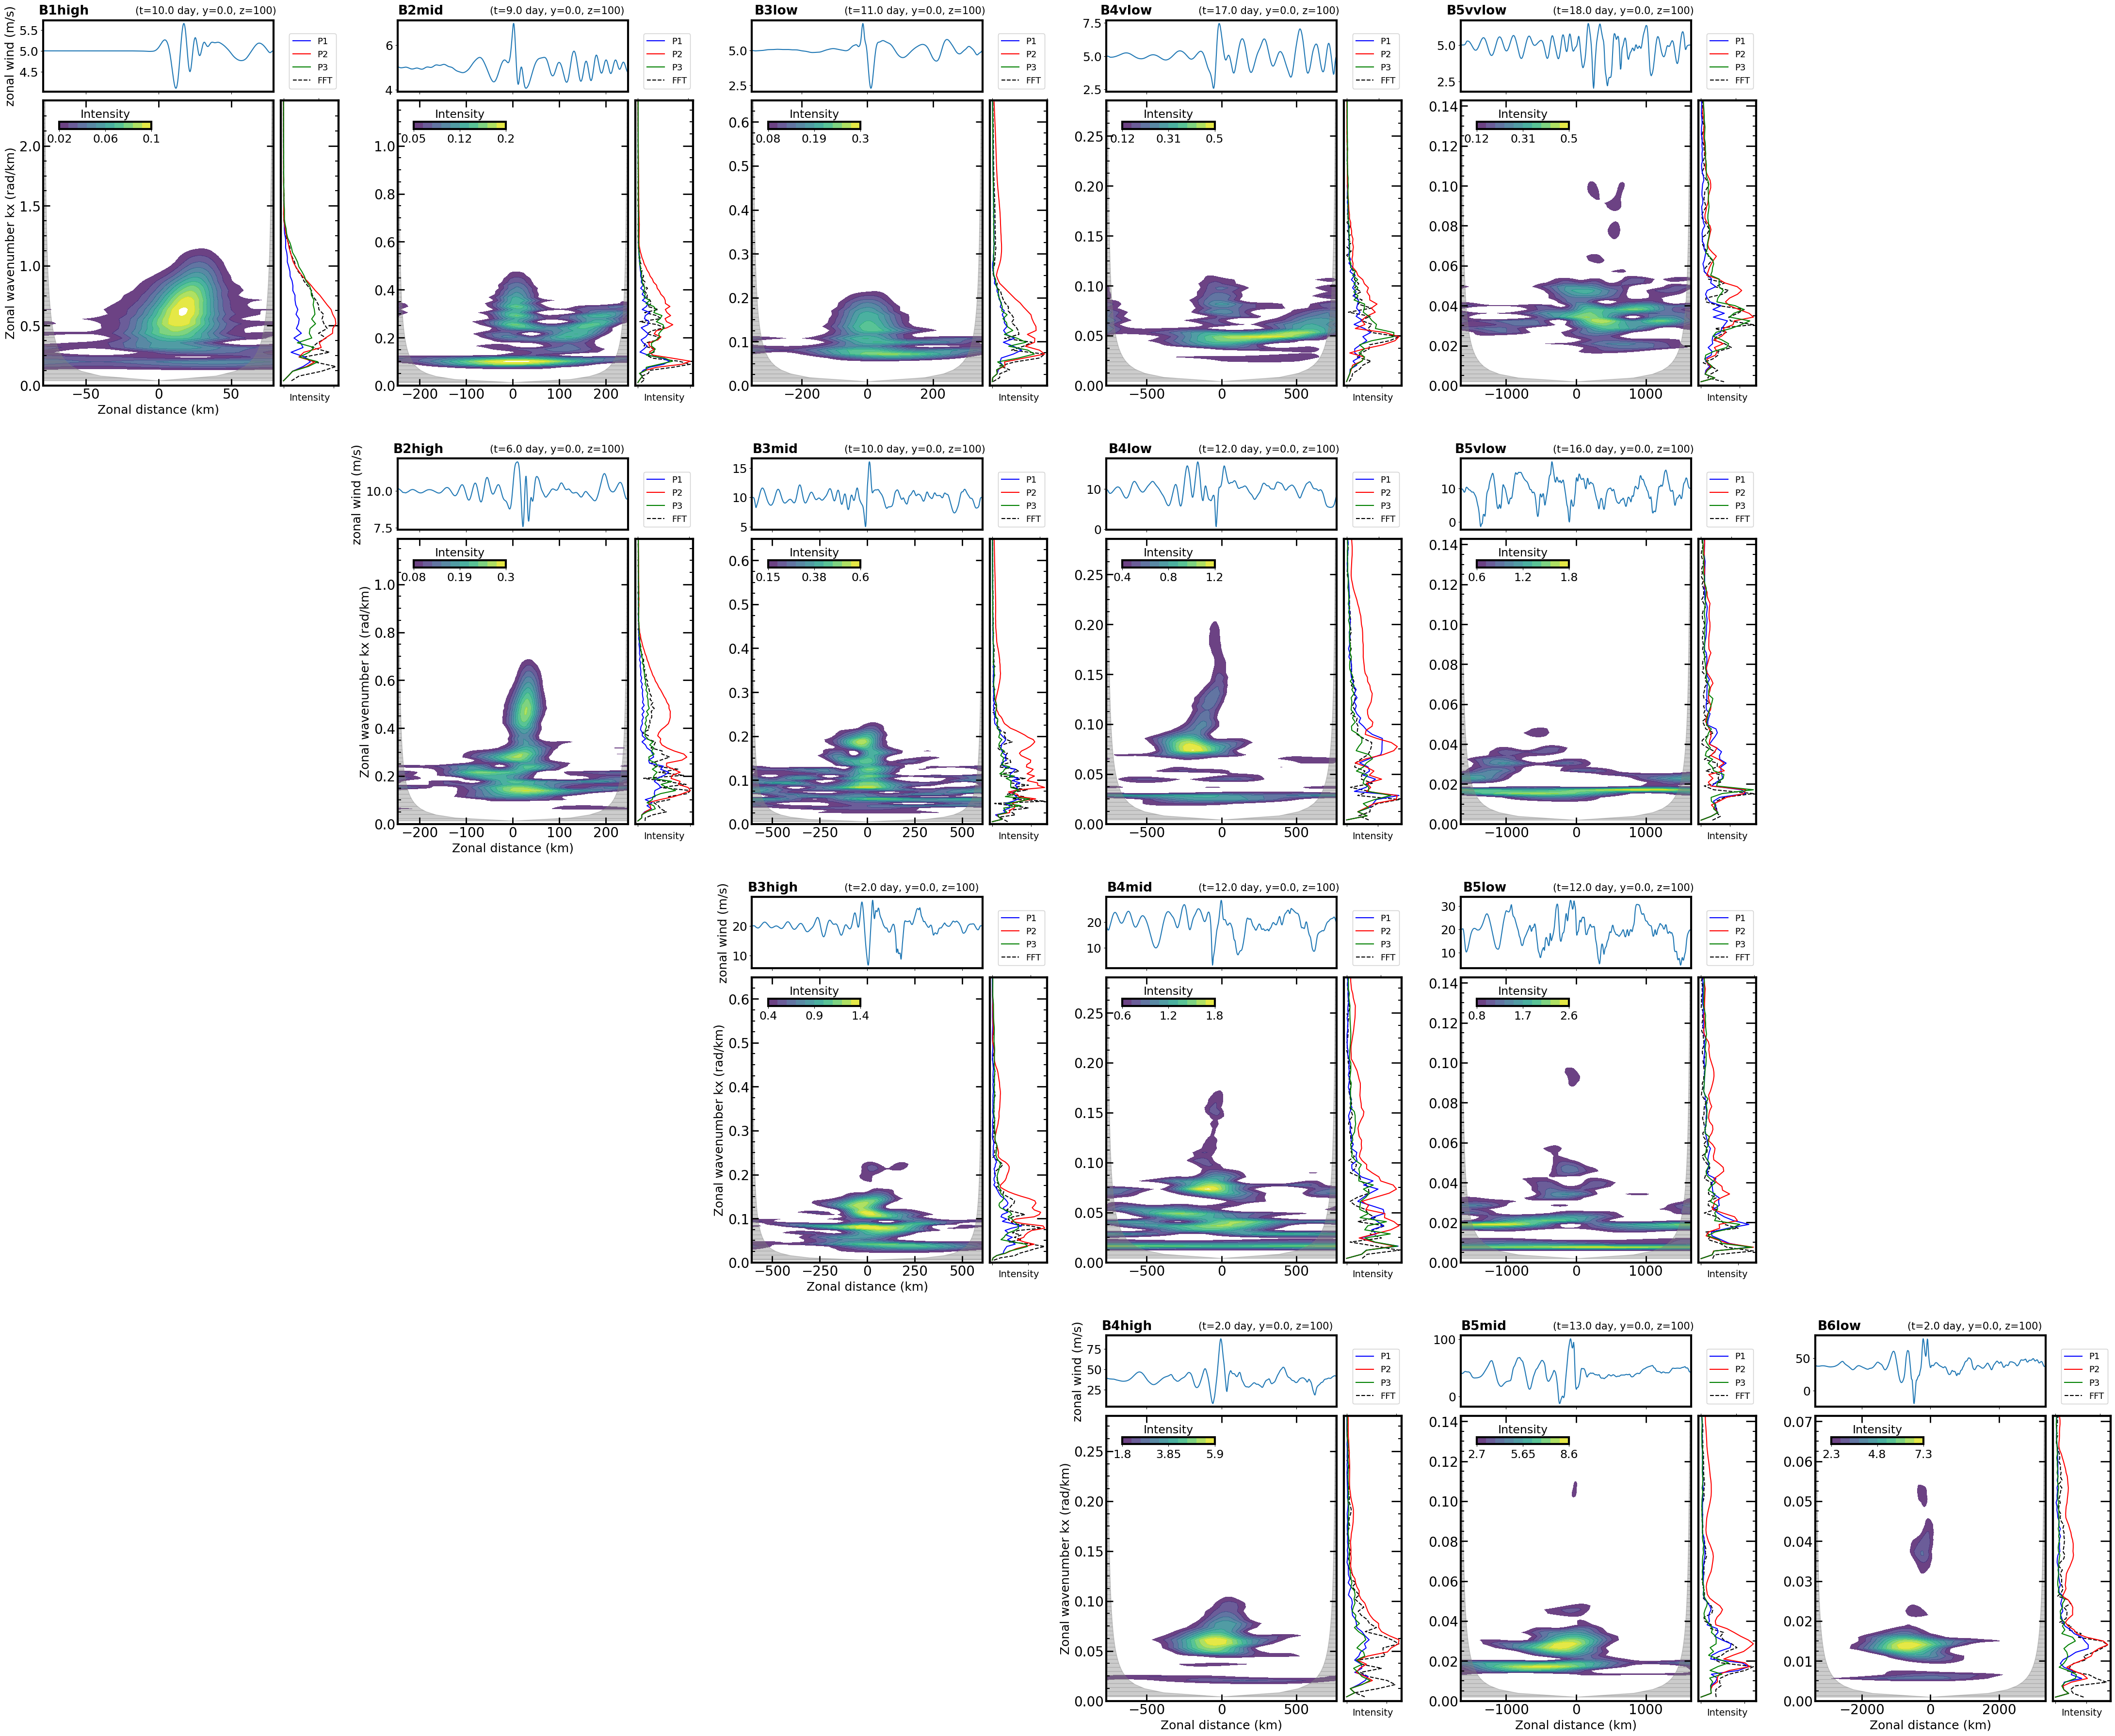

In [4]:
rows, cols = 4, 6
fig = plt.figure(figsize=(55, 45))  # Adjust aspect ratio

fig.tight_layout(pad=2.5)  # Use tight_layout to handle spacing automatically

for iname in (main_headers):
    data = all_data[iname]
    lon = data['lon']
    time = data['time']
    height = data['height'][:, 1]
    u0 = data['u(t,z,0,lon)']
    index100 = np.argmin(np.abs(height - 100.0))
    uu = u0[index100, :]
    dx = abs(lon[0] - lon[1]) * 110

    power, spectrum, freq = s_transfer(uu, dx)
    powerd = power[0:len(freq), :]  
    
    tnames = iname[:2]
    tstrength = iname[2:]
    icol = int(iname[1]) - 1
    i = icol
    if tstrength == 'high':        
        j = i
    elif tstrength == 'mid':
        j = i - 1
    elif tstrength == 'low':
        j = i - 2
    elif tstrength == 'vlow':
        j = i - 3
    elif tstrength == 'vvlow':
        j = i - 4

    spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[j, i],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
   
    axs, axu = S6(fig, spec, lon, time, height[index100], uu, powerd, spectrum, freq, iname)

    if i == j:        
        axs.set(xlabel='Zonal distance (km)', ylabel='Zonal wavenumber kx (rad/km)')
        axu.set_ylabel('zonal wind (m/s)')
    elif j == 3:
        axs.set(xlabel='Zonal distance (km)')

# plt.savefig('../article_figs/figureS6_kx.pdf', bbox_inches='tight')
# plt.savefig('../article_figs/figureS6_kx.png', bbox_inches='tight', dpi=50)
plt.show()


**ploting S7**

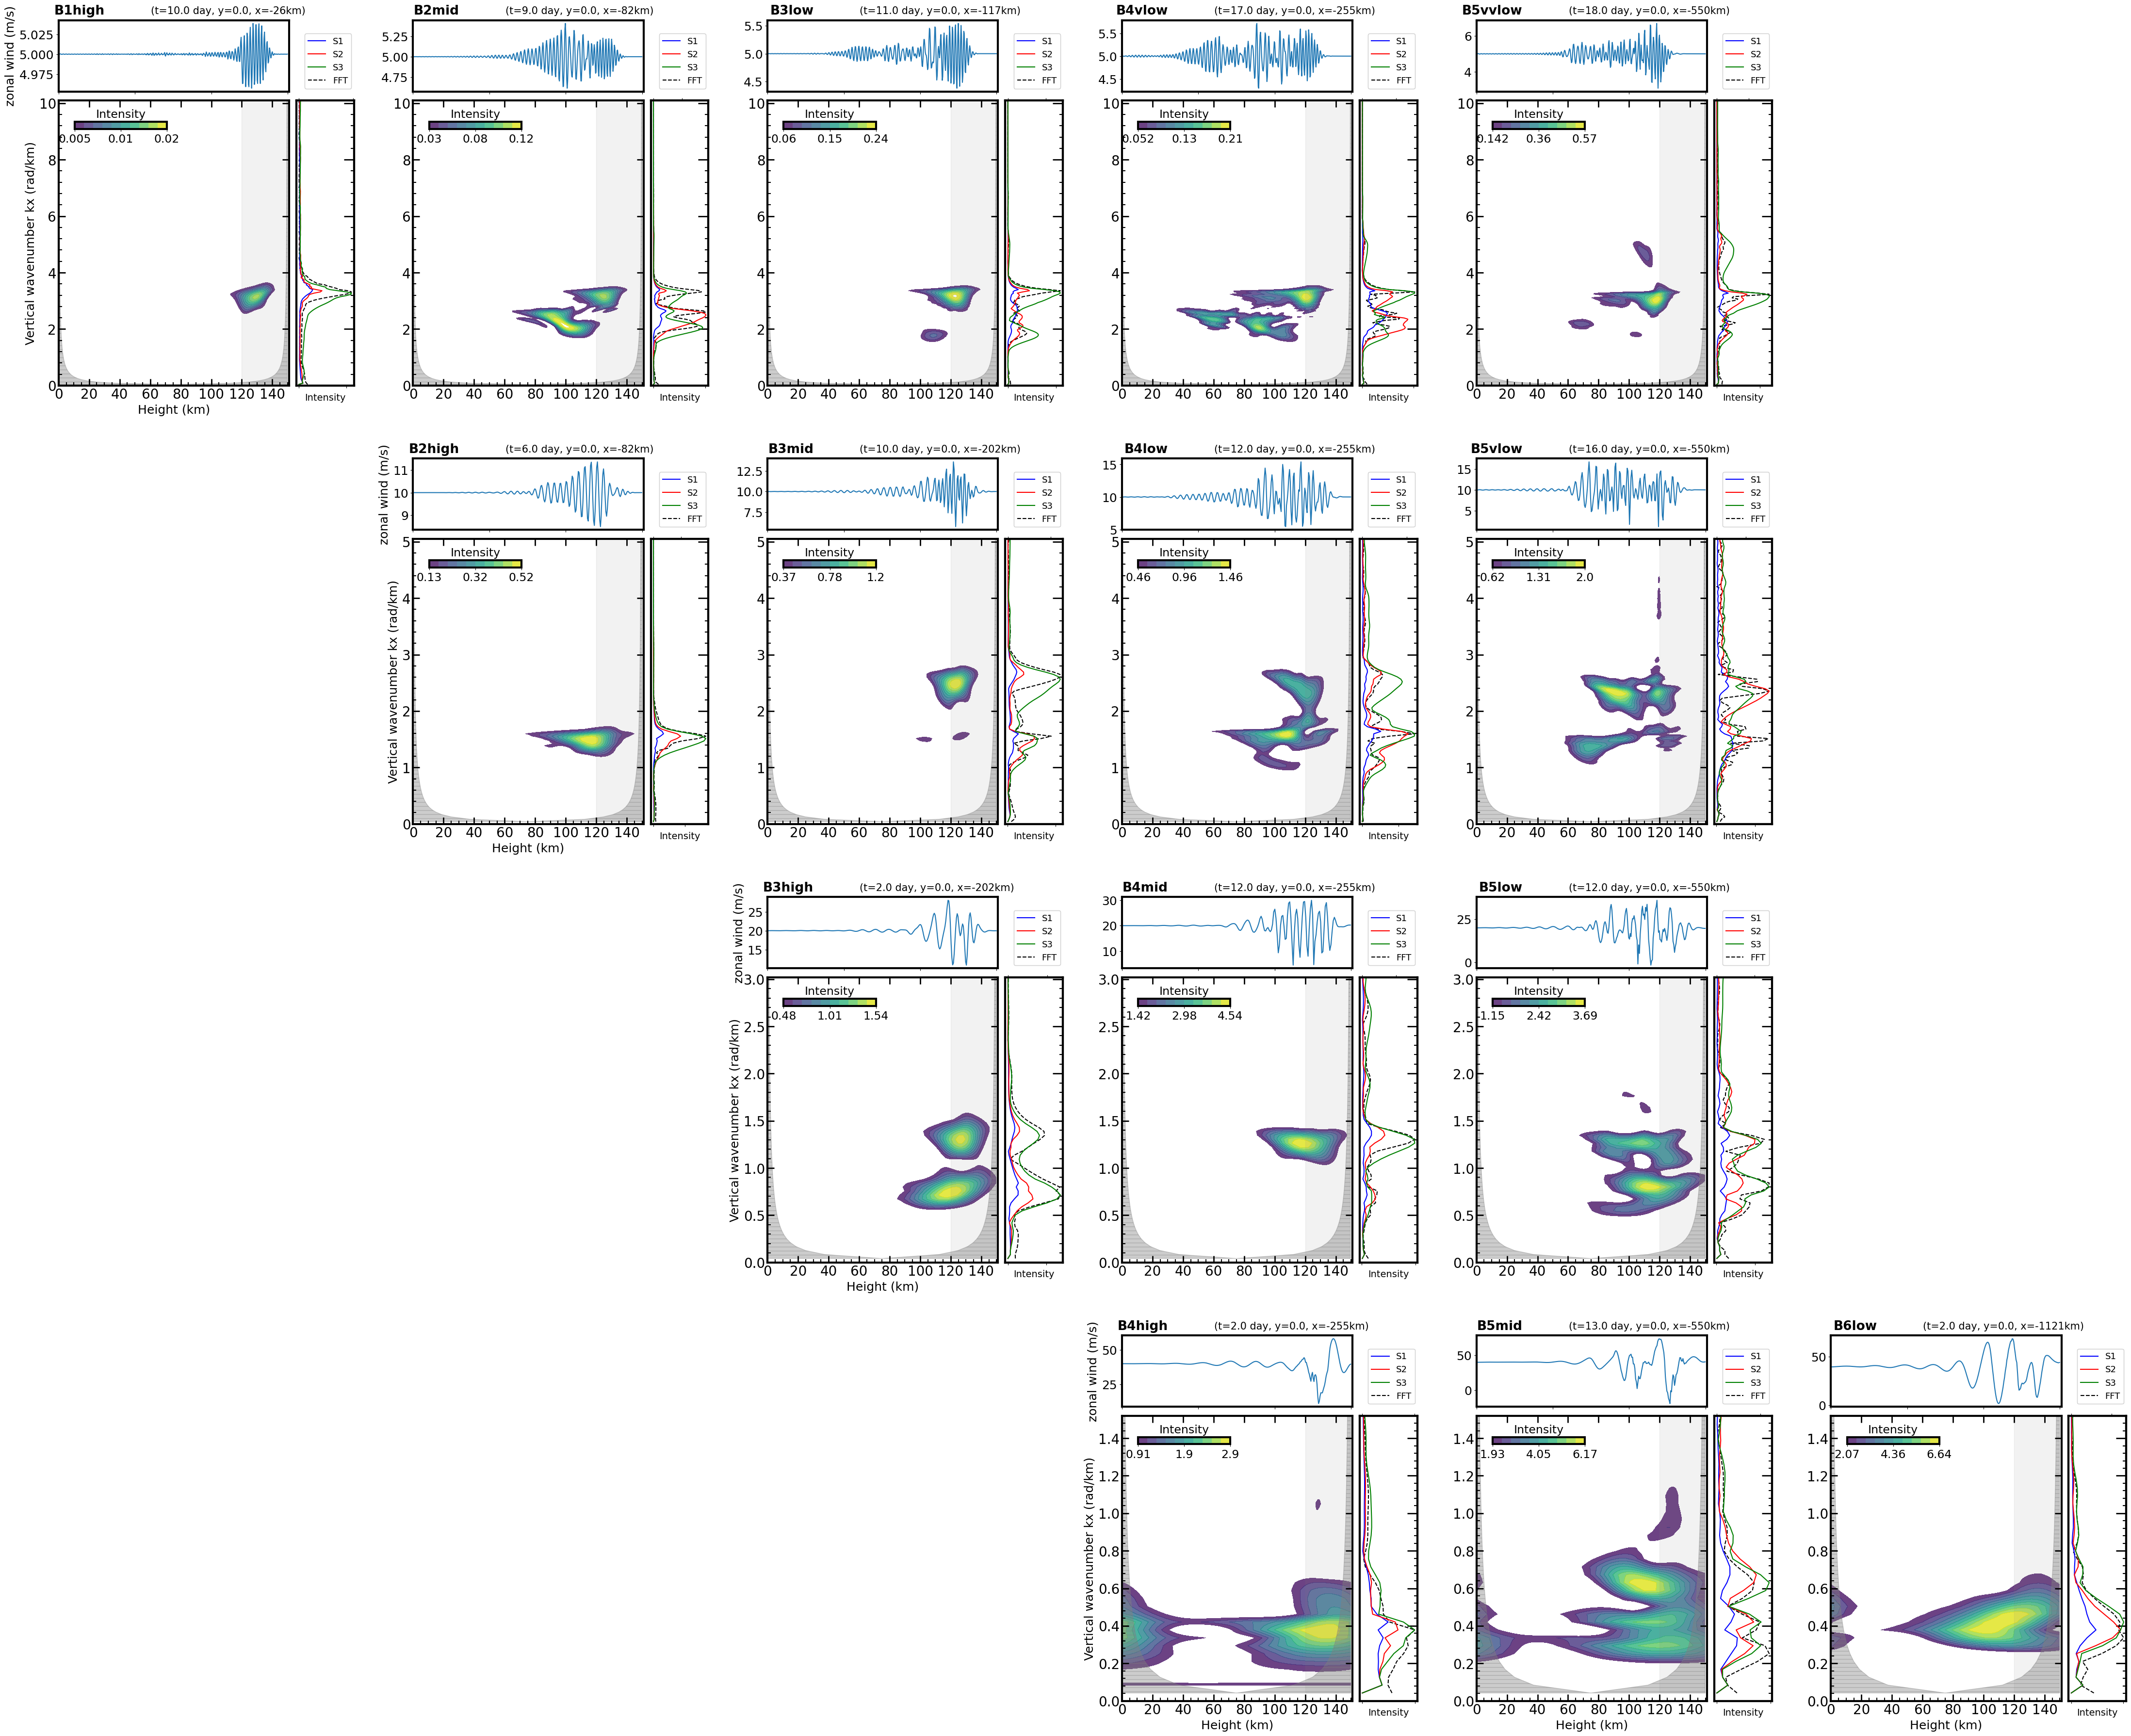

In [5]:
rows, cols = 4, 6
fig = plt.figure(figsize=(55, 45))  # Adjust aspect ratio

fig.tight_layout(pad=2.5)  # Use tight_layout to handle spacing automatically

for iname in (main_headers):
    data = all_data[iname]
    lon = data['lon']
    time = data['time']
    height = data['height'][:, 1]
    u0 = data['u(t,z,0,lon)']
    index_l = int(len(lon)/3)
    uu = u0[:, index_l]
    dz = abs(height[0] - height[1]) 

    power, spectrum, freq = s_transfer(uu, dz)
    powerd = power[0:len(freq), :]  
    
    tnames = iname[:2]
    tstrength = iname[2:]
    icol = int(iname[1]) - 1
    i = icol
    if tstrength == 'high':   j = i
    if tstrength == 'mid':    j = i - 1
    if tstrength == 'low':    j = i - 2
    if tstrength == 'vlow':   j = i - 3
    if tstrength == 'vvlow':  j = i - 4

    spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[j, i],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )

    x = int(lon[index_l]*110)# zonal distance (km)
    # print(iname,len(height),len(uu))
    axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)

    if i == j:        
        axs.set(xlabel='Height (km)', ylabel='Vertical wavenumber kx (rad/km)')
        axu.set_ylabel('zonal wind (m/s)')
    elif j == 3:
        axs.set(xlabel='Height (km)')

# plt.savefig('../article_figs/figureS7_kz.pdf', bbox_inches='tight')
# plt.savefig('../article_figs/figureS7_kz.png', bbox_inches='tight', dpi=50)
plt.show()


**ploting S8**

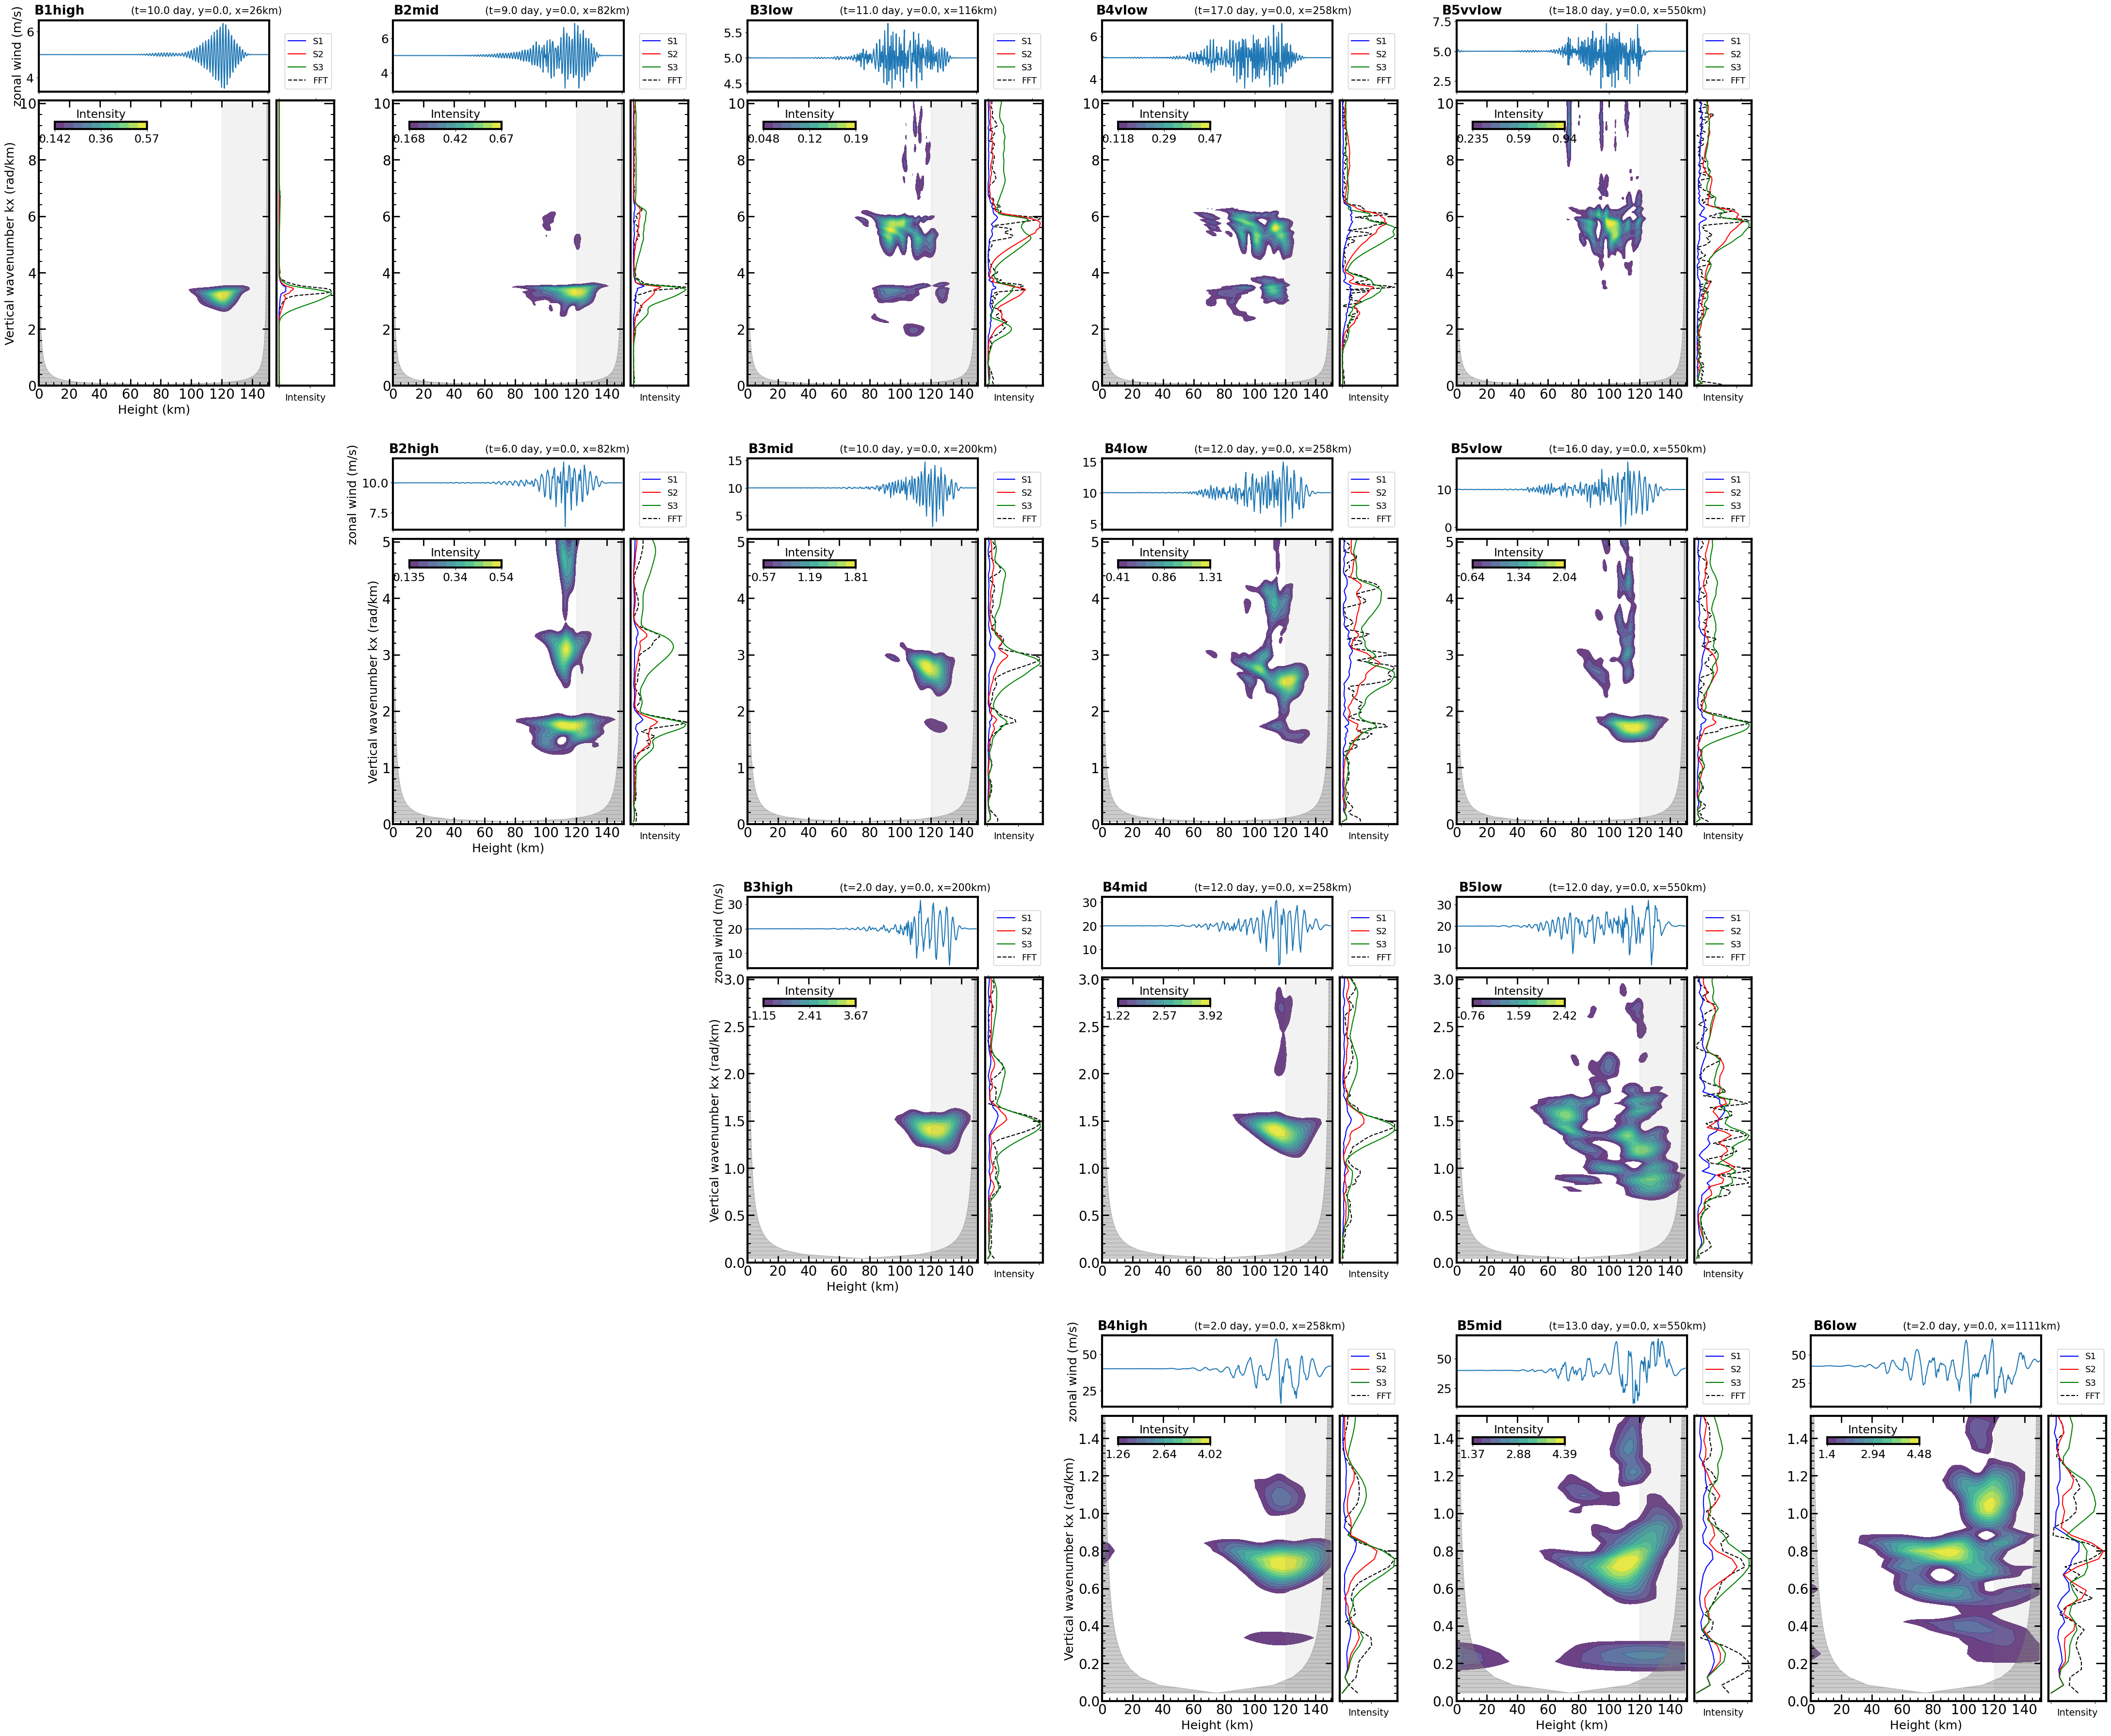

In [6]:
rows, cols = 4, 6
fig = plt.figure(figsize=(55, 45))  # Adjust aspect ratio

fig.tight_layout(pad=2.5)  # Use tight_layout to handle spacing automatically

for iname in (main_headers):
    data = all_data[iname]
    lon = data['lon']
    time = data['time']
    height = data['height'][:, 1]
    u0 = data['u(t,z,0,lon)']
    index_l = 2*int(len(lon)/3)
    uu = u0[:, index_l]
    dz = abs(height[0] - height[1]) 

    power, spectrum, freq = s_transfer(uu, dz)
    powerd = power[0:len(freq), :]  
    
    tnames = iname[:2]
    tstrength = iname[2:]
    icol = int(iname[1]) - 1
    i = icol
    if tstrength == 'high':   j = i
    if tstrength == 'mid':    j = i - 1
    if tstrength == 'low':    j = i - 2
    if tstrength == 'vlow':   j = i - 3
    if tstrength == 'vvlow':  j = i - 4

    spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[j, i],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )

    x = int(lon[index_l]*110)# zonal distance (km)
    # print(iname,len(height),len(uu))
    axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)

    if i == j:        
        axs.set(xlabel='Height (km)', ylabel='Vertical wavenumber kx (rad/km)')
        axu.set_ylabel('zonal wind (m/s)')
    elif j == 3:
        axs.set(xlabel='Height (km)')

# plt.savefig('../article_figs/figureS8_kz.pdf', bbox_inches='tight')
# plt.savefig('../article_figs/figureS8_kz.png', bbox_inches='tight', dpi=50)
plt.show()


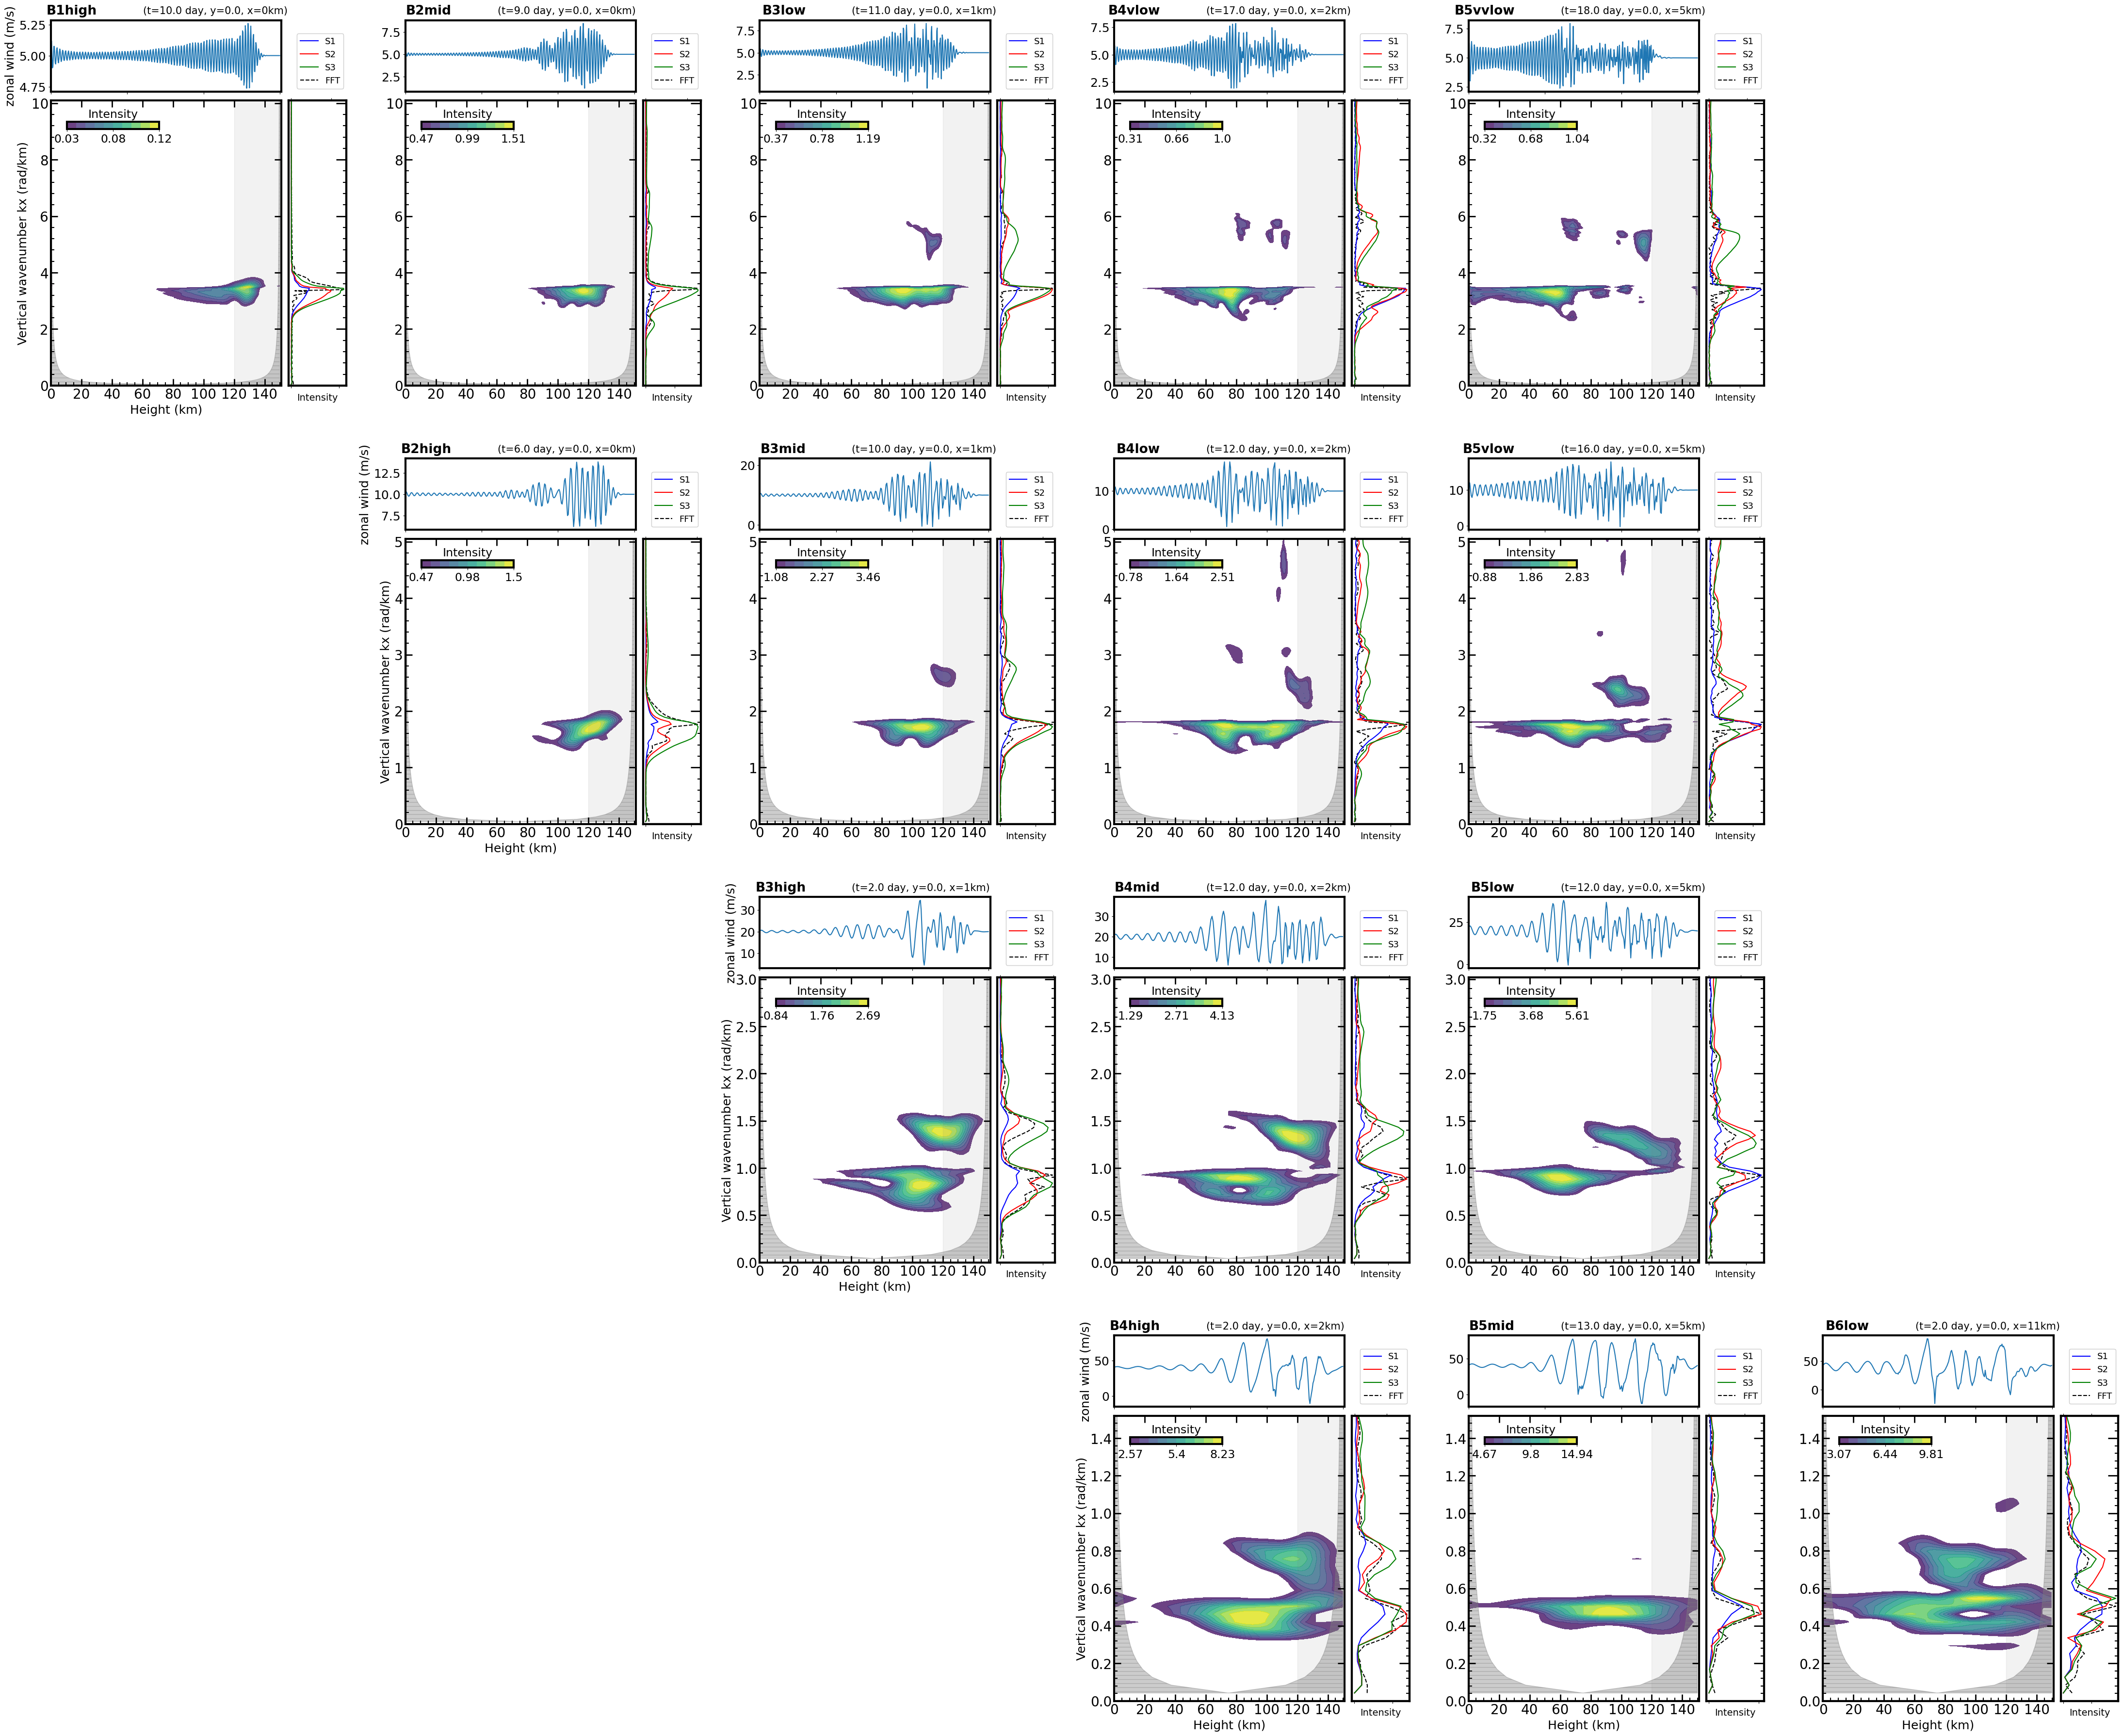

In [5]:
rows, cols = 4, 6
fig = plt.figure(figsize=(55, 45))  # Adjust aspect ratio

fig.tight_layout(pad=2.5)  # Use tight_layout to handle spacing automatically

for iname in (main_headers):
    data = all_data[iname]
    lon = data['lon']
    time = data['time']
    height = data['height'][:, 1]
    u0 = data['u(t,z,0,lon)']
    index_l = int(len(lon)/2)+1 # perpendicular to th emountain crest
    uu = u0[:, index_l]
    dz = abs(height[0] - height[1]) 

    power, spectrum, freq = s_transfer(uu, dz)
    powerd = power[0:len(freq), :]  
    
    tnames = iname[:2]
    tstrength = iname[2:]
    icol = int(iname[1]) - 1
    i = icol
    if tstrength == 'high':   j = i
    if tstrength == 'mid':    j = i - 1
    if tstrength == 'low':    j = i - 2
    if tstrength == 'vlow':   j = i - 3
    if tstrength == 'vvlow':  j = i - 4

    spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[j, i],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )

    x = int(lon[index_l]*110)# zonal distance (km)
    # print(iname,len(height),len(uu))
    axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)

    if i == j:        
        axs.set(xlabel='Height (km)', ylabel='Vertical wavenumber kx (rad/km)')
        axu.set_ylabel('zonal wind (m/s)')
    elif j == 3:
        axs.set(xlabel='Height (km)')

# plt.savefig('../article_figs/figureS8_kz.pdf', bbox_inches='tight')
# plt.savefig('../article_figs/figureS8_kz.png', bbox_inches='tight', dpi=50)
plt.show()